# Data Details - (5 Marks)

In [52]:
# Q. Import the useful Libraries from description (1 mark)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

In [53]:
# Q. Load the wine quality dataset and print the head. (1 mark)
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[5 5 5 ... 6 5 6]


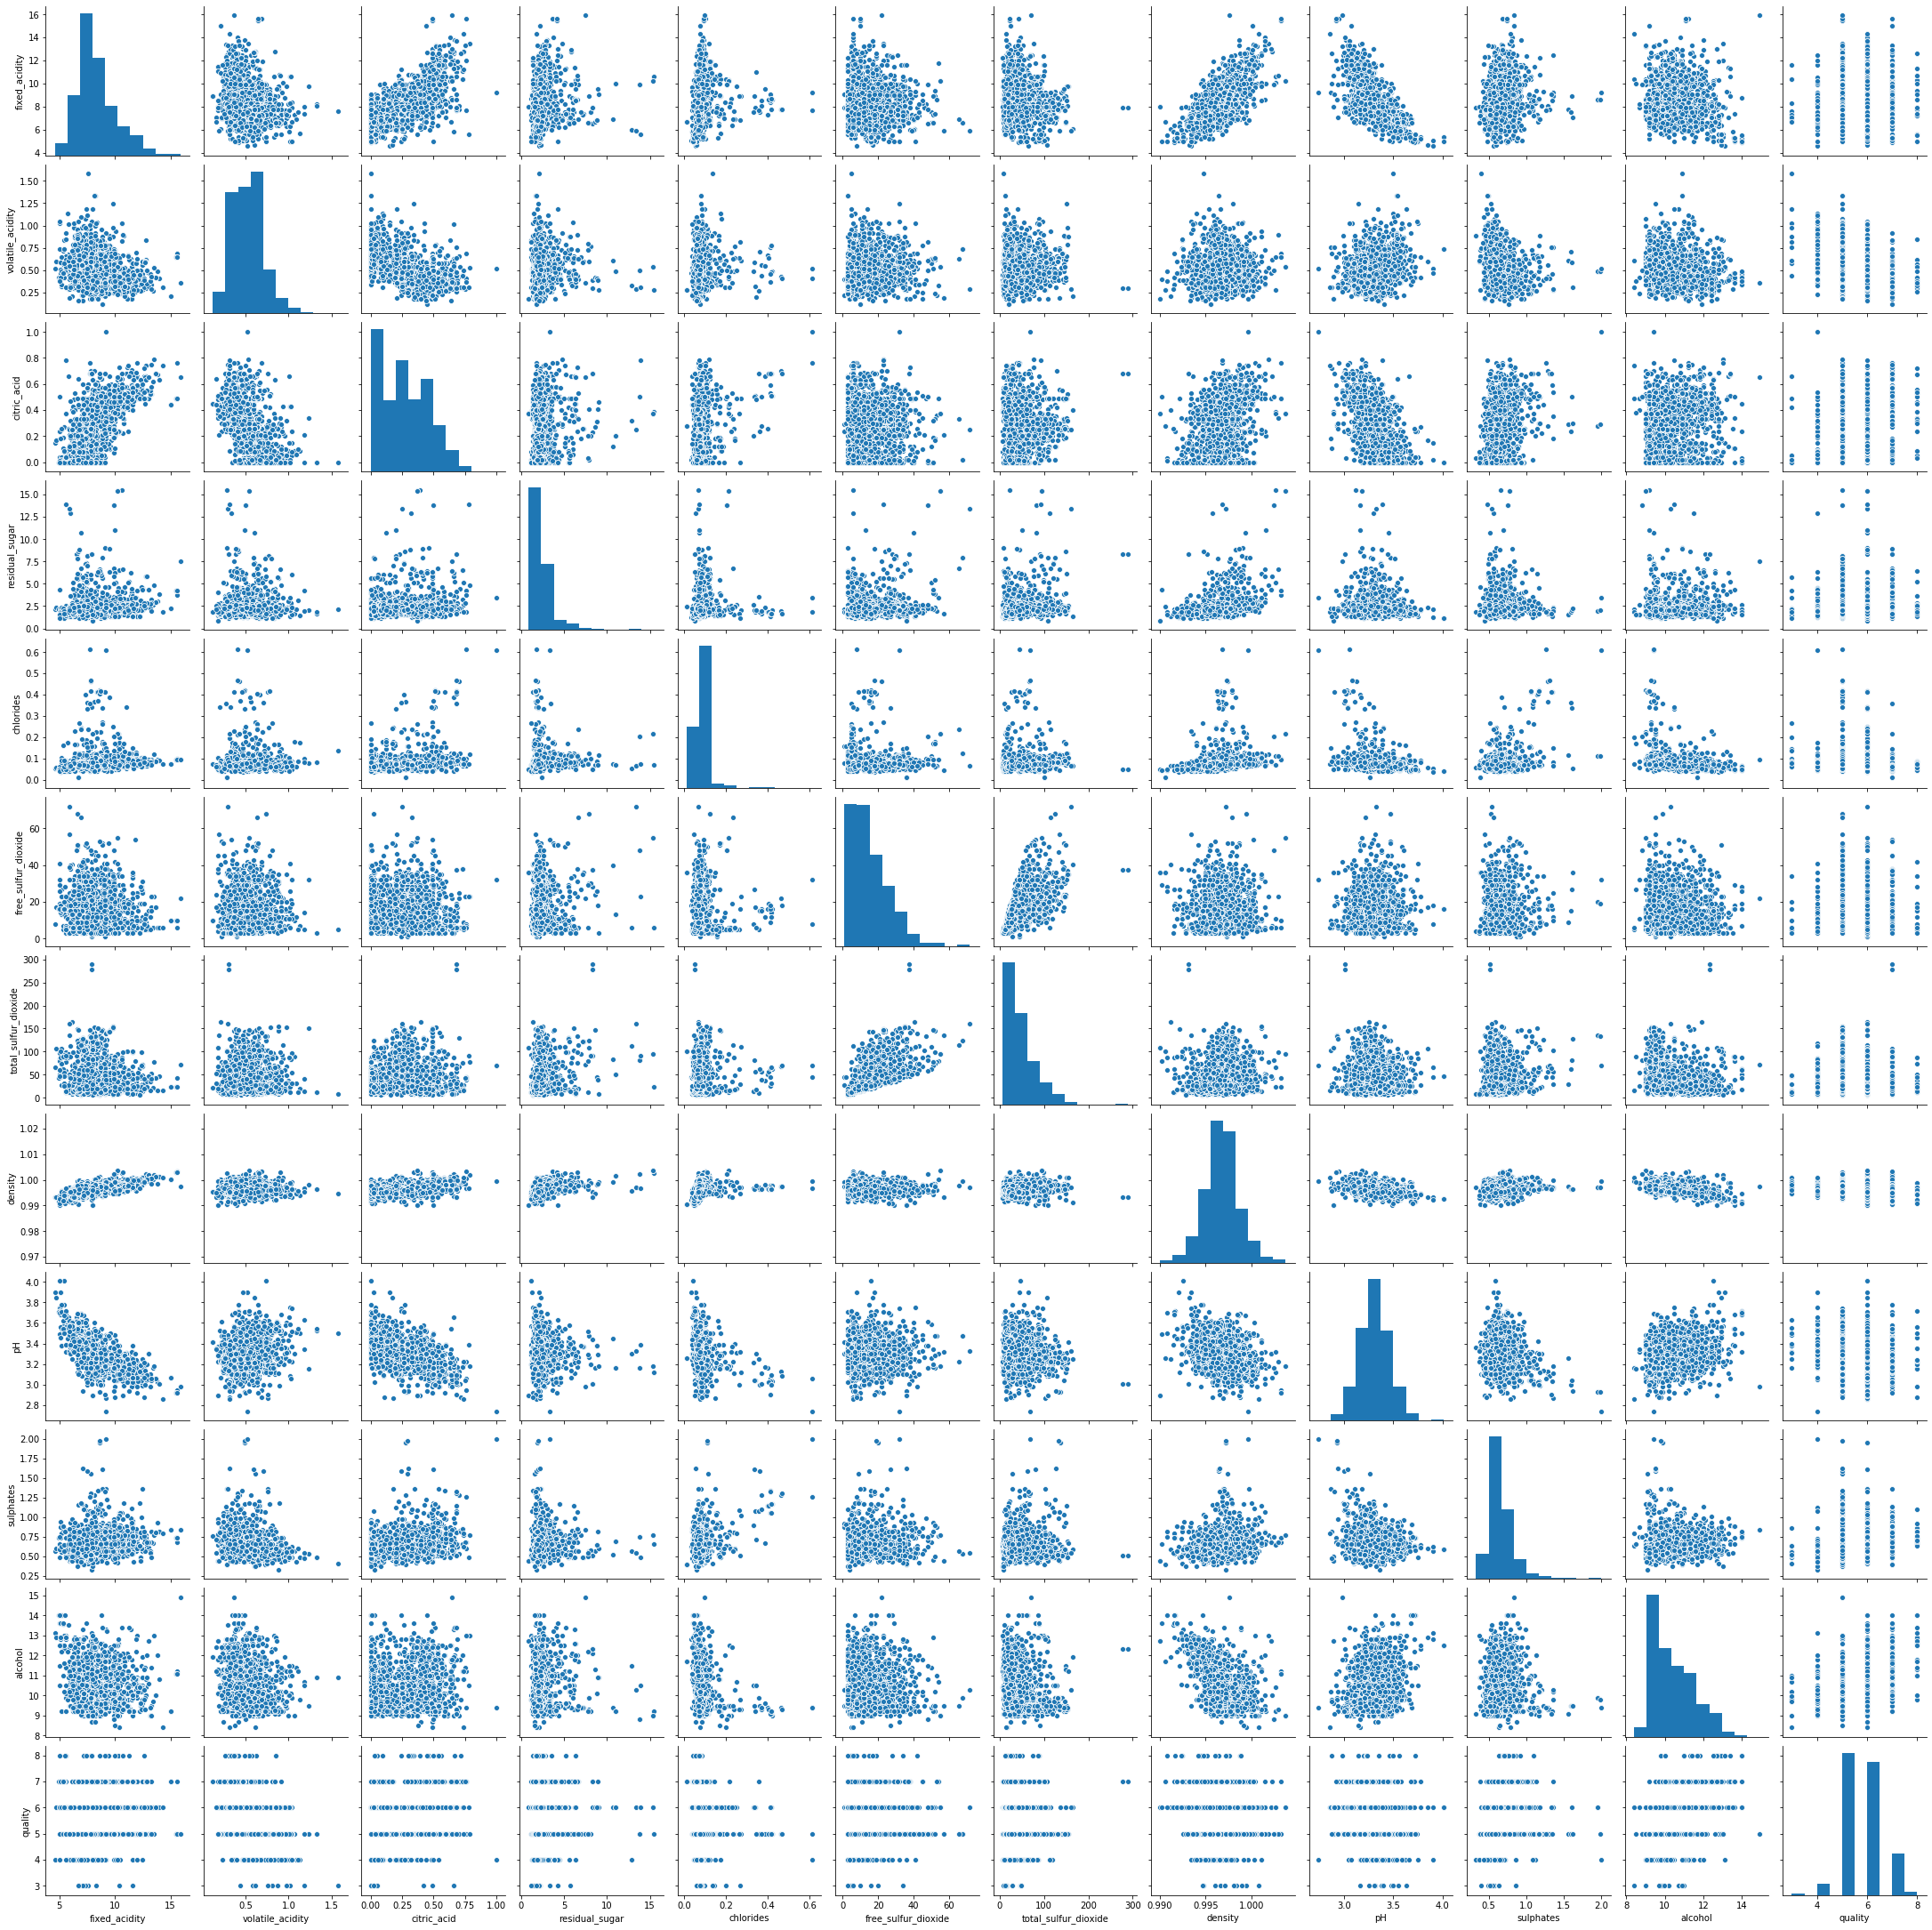

In [54]:
# Q. Count the value of Quality and perform pairplot. (1 mark)
qual = wine["quality"].values
print(qual)
sns.pairplot(wine)
plt.show()


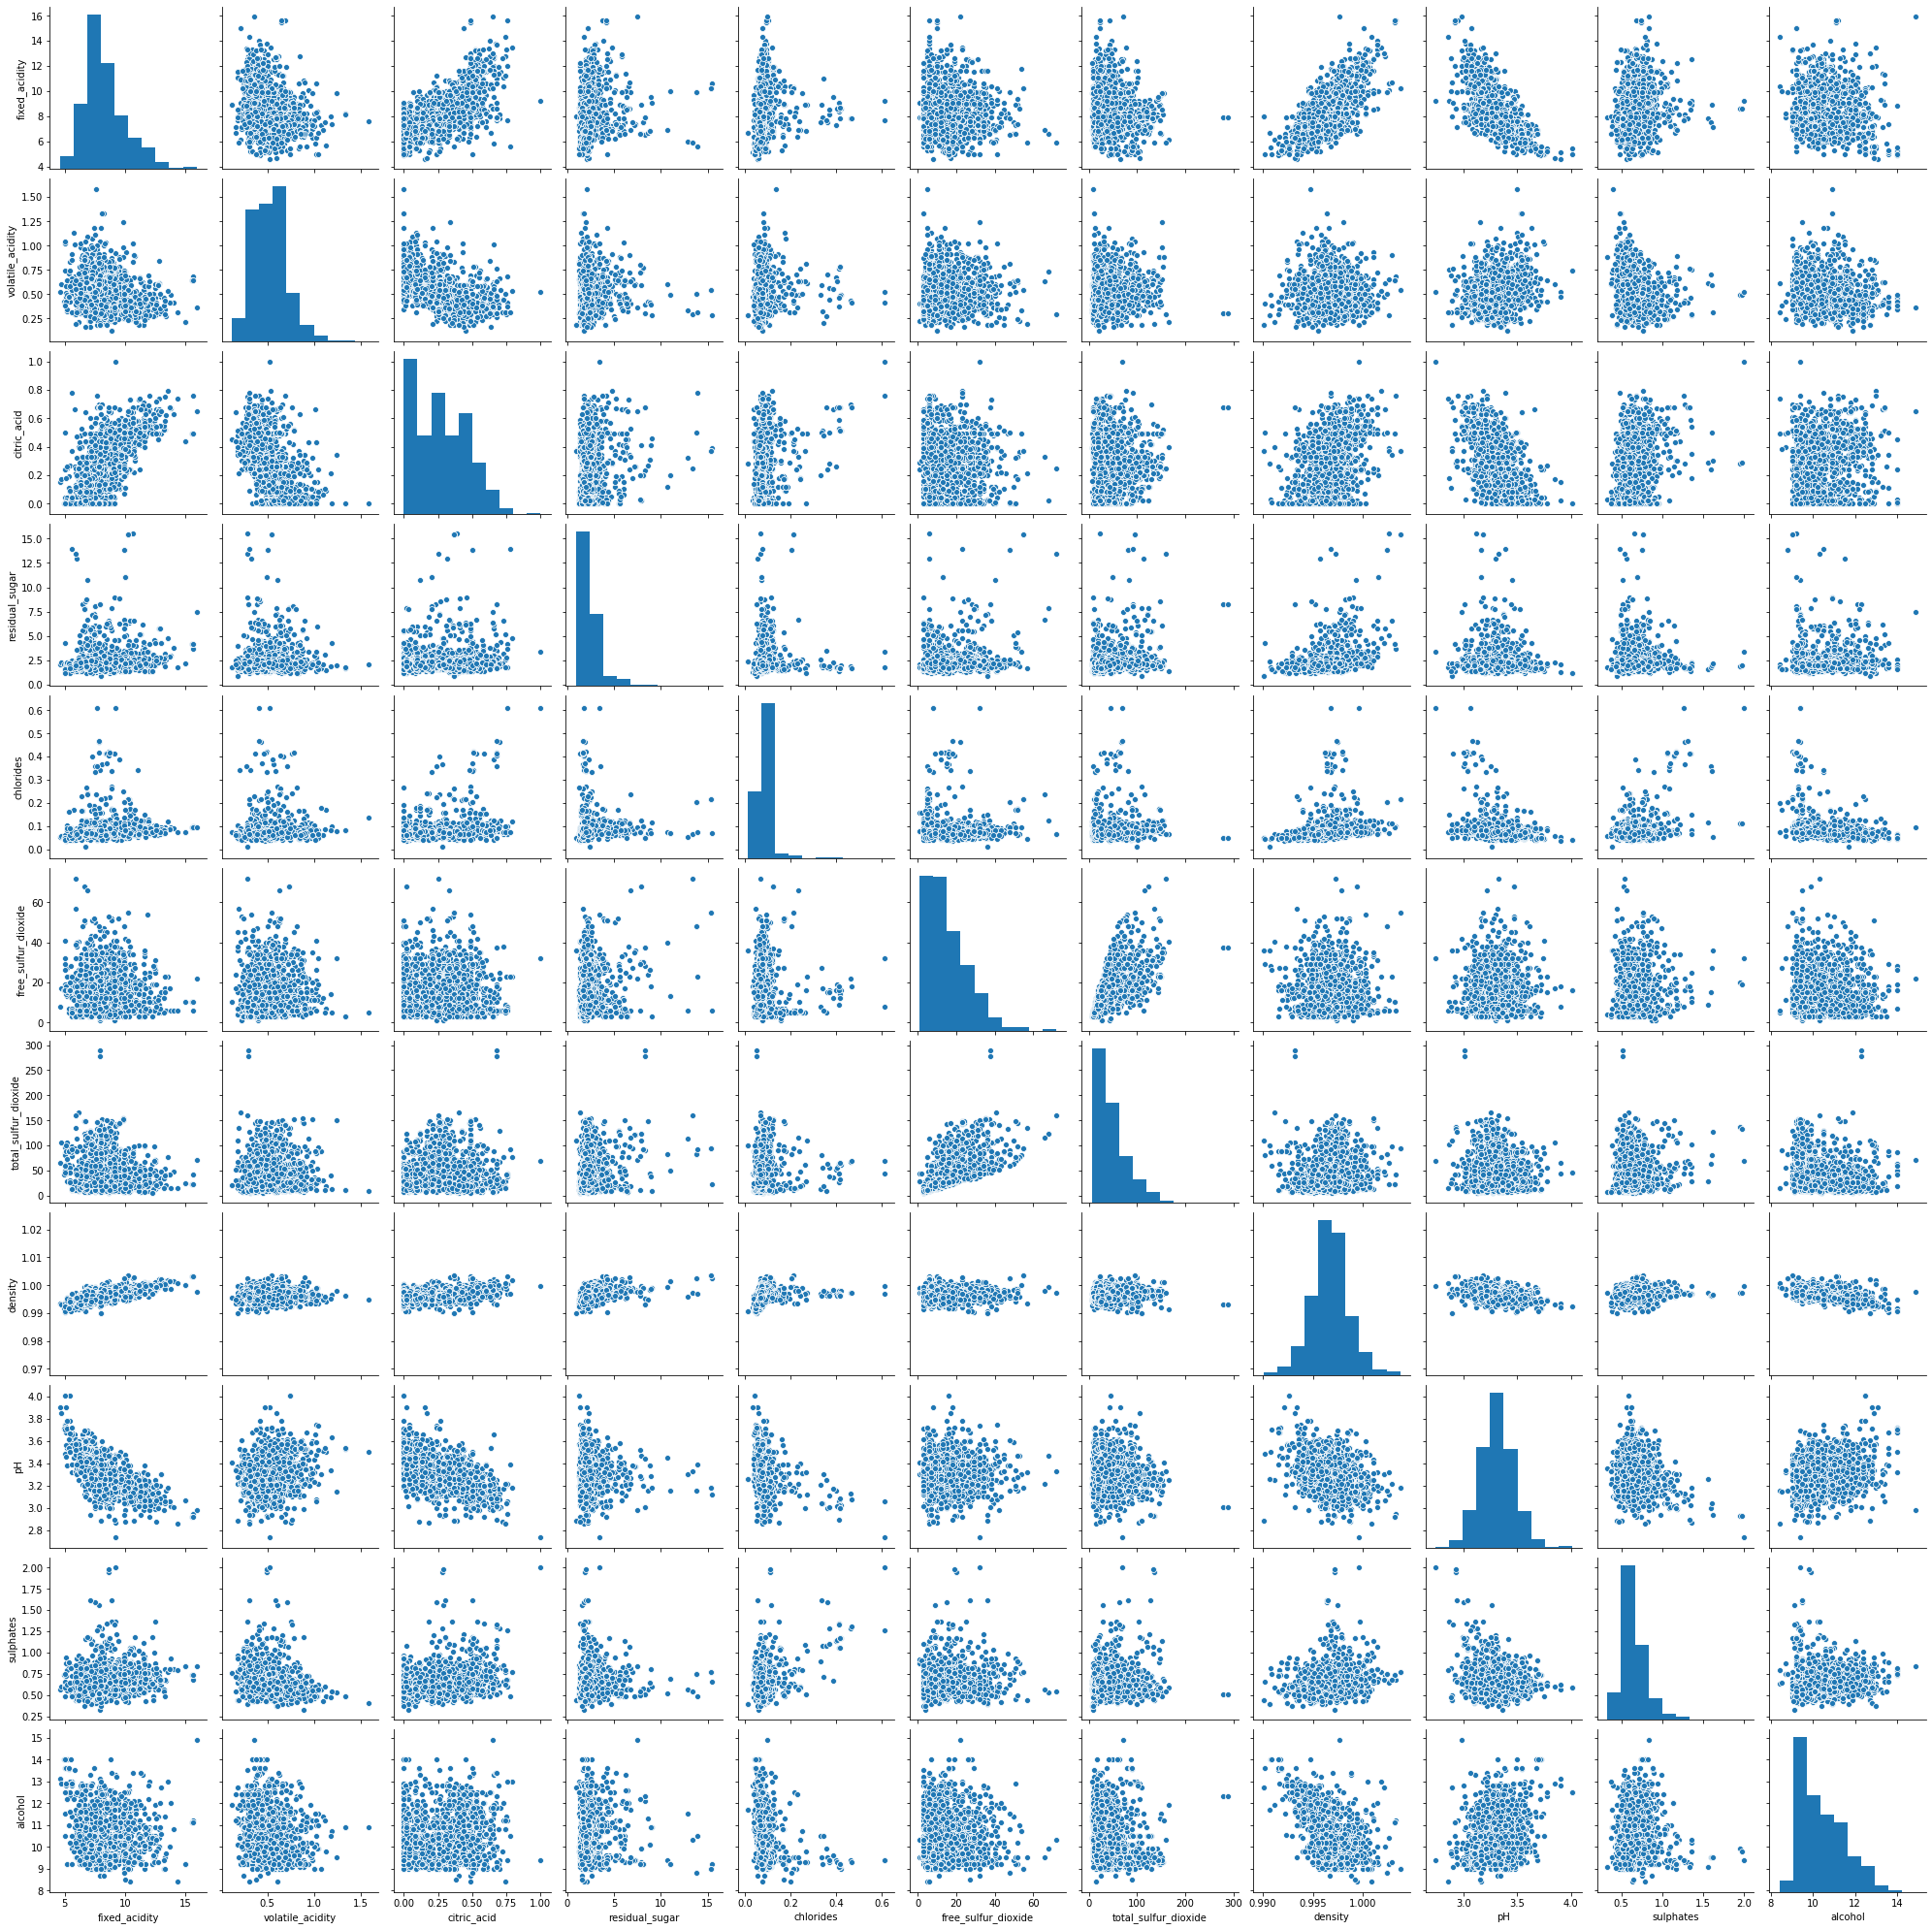

In [55]:
# Q. Drop Quality Feature From Dataset and perform pairplot. (1 mark)
drop = wine.drop("quality",axis=1)
sns.pairplot(drop)
plt.show()

In [56]:
# Q. Scale the Dataset (apply z-score) (1 mark)
wine.apply(zscore)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


# Perform Kmean  Clustering - (13 marks)

In [57]:
# Let us check optimal number of clusters-

# Q. Find suitable no of clusters for K means. (1 mark)
ks=[1,2,3,4,5,6]

# Q. Capture the cluster lables. (1 mark)
kmeans=KMeans(n_clusters=2)
# Q. Capture the centroids. (1 mark)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine)

# Q. Capture the intertia. (1 mark)
    inertia.append(model.inertia_)

# Q. Combine the cluster_range and cluster_errors into a dataframe and print it. (1 mark)
inertia = np.array(inertia)/1000
print(inertia)
inertia = pd.Series(inertia)
ks = pd.Series(ks)
wine["Inertia"] = inertia
wine["Cluster"] = ks    

[1915.12179291  692.91701897  396.29484697  284.1584215   222.22663965
  178.31766824]



The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

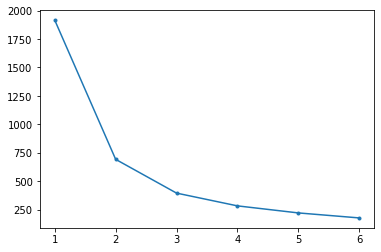

In [58]:
# Q. Perform the Elbow plot. (2 mark)
plt.plot(ks,inertia,marker=".")
plt.show()

# Take Appropriate Cluster and Build a Kmean Cluster

In [59]:
# Q. Set number of clusters. (1 mark)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)


In [60]:
# Q. Fit the input data. (1 mark)
import pandas as pd
from sklearn.cluster import KMeans
wine = pd.read_csv("winequality-red.csv")
kmeans.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
# Q. Perfrom the Centroids and print it. (1 mark)
KMeans(n_clusters=2).fit_predict(wine)

array([1, 0, 1, ..., 1, 1, 1])


# hint
kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [66]:
# Q. Create a new dataframe only for labels and convert it into categorical variable. (1 mark)
import pandas as pd
datawine = pd.DataFrame(model.labels_,columns=["WineType"])
datawine ["WineType"][wine_new["WineType"]==0]="Red"
datawine ["WineType"][wine_new["WineType"]==3]="White"
datawine 

,WineType
0,5
1,3
2,3
3,3
4,5
...,...
1594,5
1595,3
1596,5
1597,5


In [72]:
# Q. Join the label dataframe with the Wine data frame to create s_df_labeled. Note: it could be appended to original dataframe. (1 mark)
s_df_labeled=wine["WineType"]=datawine 
wine_type=wine.append(s_df_labeled)
wine_type

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [73]:
# Q. Groupby s_df_labeled and label data using Groupby function. (1 mark)
wine_clusters = wine_type.groupby("WineType")
wine_clusters.head()
#wine_clusters = wine_data_attr.groupby(['clusters'])


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,3
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0,3
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7.0,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0,2



# Use silhouette_Coefficient to Find best No of Cluster -(5 Marks)

In [69]:
## Start code here
num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(wine)
    predictions = model.predict(wine)
    results = silhouette_score(wine, predictions)
print(results)
## End code here

0.3706983014336191


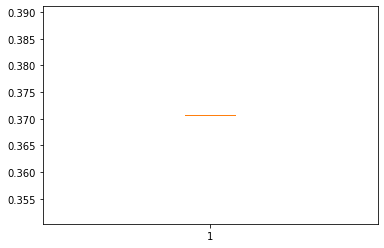

In [70]:
# Q. Show the final Boxplot (2 mark)
fig,ax = plt.subplots()
ax.boxplot(results)
plt.show()

# Build a Dendogram -(5 marks)

C:\Users\Akash Verma\anaconda decodr\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


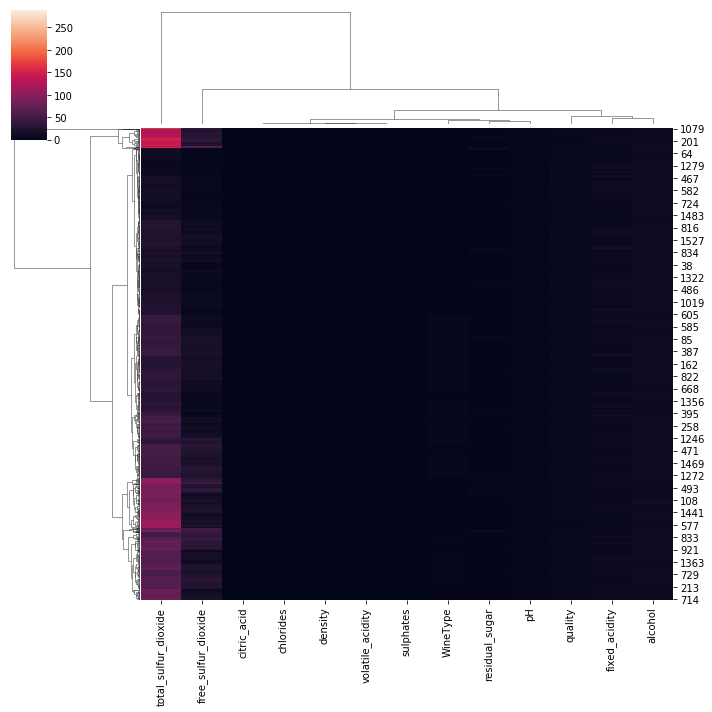

In [71]:
## Start code here
sns.clustermap(wine)
plt.show()
## End code here

# END